# Third assignment
The assignment provides problems regarding basic applications of linear algebra and machine learning. Use this notebook to perform the computations and insert your comments into it. All the coding must be done in Python 3. 

The assignment has to be submitted individually!

All your plots have to be labelled properly!  (Non-labeled plots will result in point deductions!)

**Non running cells/tasks will not be considered!**

The tasks/questions are 1.1), 1.2), 1.3), 1.4), 1.5), 2.1), 2.2), 2.3), 2.4), 2.5), 3.1), 3.2), 3.3), 3.4), 4.1) and 4.2). After each task description there is an answer cell for your code or text. For coding tasks they look like this:

```
# YOUR CODE HERE
```
(You can delete the "YOUR CODE HERE" comment, if you like.)

For markdown (text) cells the response cell will include this:

**WRITE YOUR ANSWER HERE**

Sometimes they are followed by test cells. You can run the test cells after you finished the task. If these cells don't show any errors, your answer is right. You can't/shouldn't edit test cells!

After you finished the notebook you can hit the "Validate" button on the top of the notebook to see if all test are good. You can also use the "Validate" button on the "Assignment" tap on the main page of python.ldv.ei.tum.de. Some tasks will be graded manually (e.g. plots, text answers). They don't have a following test cell. 

Please make sure to hit the "Submit" button on the "Assignment" tab on the main page of python.ldv.ei.tum.de before the deadline passes. You will get your final score after the deadline.

**Some tips:**
- Only change cells with `# YOUR CODE HERE` or **WRITE YOUR ANSWER HERE**
- Do not change cell types or the notebook name.
- Do not add other .ipynb files into the ami22 folder or subfolders.
- Do not override the original files in the ami22 folder or subfolders.
- For every plot makes sure that axes are correctly labeled with original labels and not encoded ones. 
- If you are asked to provide multiple plots, make sure that the titles are clear. A plot should be self explanatory, we should not have to look at your code to know what is plotted. 

#### Date of submission: May 23, 2022, 23:55 hrs

In [111]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Insurance Dataset

In this assignment you will explore an insurance dataset. The target to be predicted will be the charges for a person given its age, BMI, region and so on. To get a better insight into the data and a potentally better model, you will explore the Principal Component Analysis.
In contrast to the last assignment, where we used sklearn's encoder/transformer, we now show the possibility to use pandas routines to encode the categorical features. Moreover, we have already done the data splitting for you. 

In [112]:
data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
region_cat = data.region
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'])
X=data.drop(columns=['charges', 'sex_male', 'smoker_no'])
y=data.charges
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=.33, random_state=150)

**Task 1.1**

Generate a `PCA()` object using sklearn (with default values, so no arguments need to be passed). Assign the `PCA()`object to the variable `pca1`. Fit `pca1` with the training features and `X_train` and inspect the *scree plot* below.

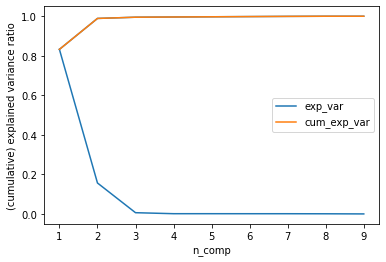

In [113]:
# YOUR CODE HERE
from sklearn import decomposition
from sklearn.decomposition import PCA
pca1 = PCA()
pca1.fit_transform(X_train)

evr1 = pca1.explained_variance_ratio_
sns.lineplot(x=np.arange(X.shape[1])+1,y=np.cumsum(evr1))
plotdf = pd.DataFrame({'n_comp': np.arange(X.shape[1])+1, 'exp_var': evr1, 'cum_exp_var': np.cumsum(evr1)})
sns.lineplot(x='n_comp', y='(cumulative) explained variance ratio', hue='', data=pd.melt(plotdf, ['n_comp'], var_name='', value_name='(cumulative) explained variance ratio'))
plt.show()

**Task 1.2**

Which of the following statements is true? 

The values of `explained_variance_ratio_`... 

'a': ... can be derived from the singular values of X_train (after mean centering)

'b': ... can be derived from the eigenvalues of X_train (after mean centering)

'c': ... are the same as the squared eigenvalues of X_train (after mean centering)

'd': ... are computed on the test set only (after mean centering).

*Use a variable* `x12` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x12='e'`. *There is only one correct answer.*

In [114]:
# YOUR CODE HERE
x12='b'
print('The answer is ' + x12 + '.')

The answer is b.


**Task 1.3**

Compute the so called *scores* by transforming `X_train` and assign it to the variable `T1`. As you can see, your scores `T1` will be put together in a big dataframe, which will be used for visualization.

In [115]:
# YOUR CODE HERE

T1 = pca1.transform(X_train)
all_data_train1 = pd.concat([X_train,pd.DataFrame(T1, index=X_train.index).add_prefix('T')], axis=1)
all_data_train1['charges'] = y_train
all_data_train1['region_cat'] = region_cat[X_train.index]
all_data_train1.head(5)

,age,bmi,children,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,T0,T1,T2,T3,T4,T5,T6,T7,T8,charges,region_cat
1,18,33.770,1,0,0,0,0,1,0,-20.560615,4.382231,-0.064625,0.674097,-0.021924,-0.410551,0.001873,-0.381023,-5.513942e-17,1725.55230,southeast
77,21,35.530,0,0,0,0,0,1,0,-17.453746,5.936607,-1.077163,0.636624,0.015492,-0.392975,0.024971,-0.382389,-1.661617e-16,1532.46970,southeast
1022,47,36.080,1,0,1,0,0,1,0,8.526935,4.796134,-0.122455,0.880059,0.092683,-0.501449,-0.046149,0.623850,-1.661617e-16,42211.13820,southeast
827,36,28.025,1,0,1,1,0,0,0,-2.973738,-2.552831,-0.052094,0.570084,0.639132,0.591366,-0.159170,0.683852,-1.939173e-16,20773.62775,northeast
1005,29,31.730,2,0,0,0,1,0,0,-9.715068,1.608232,0.956450,0.014943,0.051567,0.102899,1.018720,-0.134961,2.501719e-16,4433.38770,northwest


**Task 1.4**

Get the so called *loadings* from the `pca1` object and store it in the variable `P1`. It is easier to interpret, if the loadings are in a common range, therefore the so called *correlation loadings* can be obtained by scaling the loadings with the square root of the `explained_variance_ratio_`. To do so, transpose the loadings `P1` and multiply it with the square root of the `explained_variance_ratio_`. Store the correlation loadings in the variable `R1`!

In [116]:
# YOUR CODE HERE

P1 = pca1.components_
correlation_loadings = P1.T * np.sqrt(evr1)
R1 = correlation_loadings

Let's have some look into scores and loadings (at least for the first two principal components):


| |
|:--:|
|PCA Scores and Loadings|
|![4scatter1](4scatter1.svg)|
||

**Task 1.5**

Which of the following statements is true?

'a': If we use a PCA before Linear Regression the target (in our case `charges`) has the highest correlation with the first principal component.

'b': The more principal components are computed the closer the pair-wise correlation between the principal components will be to zero.

'c': The second principal component can be associated with the variable `bmi`.

'd': PCA seeks to maximize the covariance between the features `X_train` and the target `y_train`.

*Use a variable* `x15` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x15='e'`. *There is only one correct answer.*

In [117]:
# YOUR CODE HERE
x15='c'
print('The answer is ' + x15 + '.')

The answer is c.


**Task 2.1**

Now, we will repeat the calculation of the PCA but with scaled features. Create a `StandardScaler()` object and assign it to the variable `sc`. Fit it and transform the training features to `X_train_s` and the test features to `X_test_s`.

In [141]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)
X_train_s = pd.DataFrame(X_train_s, columns=X_train.columns, index=X_train.index)
X_test_s = pd.DataFrame(X_test_s, columns=X_test.columns, index=X_test.index)

**Task 2.2**

Generate a `PCA()` object using sklearn (with default values, so no arguments need to be passed). Assign the `PCA()`object to the variable `pca2`. Fit `pca2` with the scaled training features and inspect the *scree plot*, again.

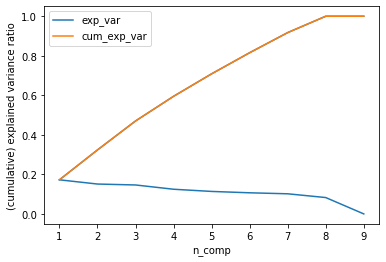

In [142]:
# YOUR CODE HERE
pca2 = PCA()
pca2.fit_transform(X_train_s)
evr2 = pca2.explained_variance_ratio_
sns.lineplot(x=np.arange(X.shape[1])+1, y=np.cumsum(evr2))
plotdf = pd.DataFrame({'n_comp': np.arange(X.shape[1])+1, 'exp_var': evr2, 'cum_exp_var': np.cumsum(evr2)})
sns.lineplot(x='n_comp', y = '(cumulative) explained variance ratio', hue='', data=pd.melt(plotdf, ['n_comp'], var_name='', value_name='(cumulative) explained variance ratio'))
plt.show()

**Task 2.3**

Compute the so called *scores* by transforming `X_train_s` and assign it to the variable `T2`. Again, your scores `T2` will be put together in a big dataframe, which will be used for visualization.

In [143]:
# YOUR CODE HERE
T2 = pca2.transform(X_train_s)
all_data_train2 = pd.concat([X_train_s,pd.DataFrame(T2, index=X_train.index).add_prefix('T')], axis=1)
all_data_train2['charges'] = y_train
all_data_train2['region_cat'] = region_cat[X_train_s.index]
all_data_train2.head(5)

,age,bmi,children,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,T0,T1,T2,T3,T4,T5,T6,T7,T8,charges,region_cat
1,-1.499440,0.495801,-0.051325,-0.977922,-0.508357,-0.567040,-0.541229,1.616448,-0.582505,1.742888,-0.566507,0.132481,1.197608,0.155433,-1.278609,-0.892143,0.113520,-2.345792e-16,1725.55230,southeast
77,-1.283177,0.785328,-0.887455,-0.977922,-0.508357,-0.567040,-0.541229,1.616448,-0.582505,1.910294,-0.694871,0.153748,1.055548,-0.354999,-0.754439,-1.333063,0.300252,-2.345792e-16,1532.46970,southeast
1022,0.591103,0.875806,-0.051325,-0.977922,1.967121,-0.567040,-0.541229,1.616448,-0.582505,2.285337,-0.775893,-0.253108,0.772830,0.748072,1.427407,0.551846,-0.352002,9.848771e-17,42211.13820,southeast
827,-0.201862,-0.449274,-0.051325,-0.977922,1.967121,1.763545,-0.541229,-0.618640,-0.582505,-0.856842,-1.624484,-1.551124,1.072445,0.755476,1.131453,0.597412,0.243096,4.315546e-16,20773.62775,northeast
1005,-0.706476,0.160213,0.784805,-0.977922,-0.508357,-0.567040,1.847645,-0.618640,-0.582505,-0.704688,0.168267,1.770866,0.659747,1.392184,-0.391470,-0.550985,0.567158,-7.896907e-16,4433.38770,northwest


**Task 2.4**

Get the so called *loadings* from the `pca2` object and store it in the variable `P2`. It is easier to interpret, if the loadings are in a common range, therefore the so called *correlation loadings* can be obtained by scaling the loadings with the square root of the `explained_variance_ratio_`. To do so, transpose the loadings `P2` and multiply it with the square root of the `explained_variance_ratio_`. Store the correlation loadings in the variable `R2`!

In [121]:
# YOUR CODE HERE

P2 = pca2.components_
correlation_loadings = P2.T * np.sqrt(evr2)
R2 = correlation_loadings

Let's have some look into scores and loadings (at least for the first two principal components):


| |
|:--:|
|PCA Scores and Loadings (Standardized Features X)|
|![4scatter2](4scatter2.svg)|
||

**Task 2.5**

Which of the following statements is true?

'a': PCA is not sensitive to feature-scaling. The scaling factors can be multiplied with the scores to get the same values as in the unscaled PCA model.

'b': PCA is not sensitive to feature-scaling. The scaling factors can be multiplied with the loadings to get the same values as in the unscaled PCA model.

'c': The second principal component can be associated with the variable `bmi`.

'd': The strongest variance in the data set can be found in the standard-scaled variables associated with regions dummy variables.

*Use a variable* `x25` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x25='e'`. *There is only one correct answer.*

In [122]:
# YOUR CODE HERE
x25='d'
print('The answer is ' + x25 + '.')

The answer is d.


**Task 3.1**

Correlations and collinearity can lead to numerical problems in linear regression. The calculation of the coefficients using the closed form solution - which can be derived with paper and penicil ( $b = (X_{train}^T X_{train})^{-1}X_{train}^Ty_{train}$ ) - involves the inversion of the matrix $(X_{train}^T X_{train})^{-1}$. A high condition number is an indication that the direct inversion of such matrix can lead to problems. 

> _The condition number of x is defined as the norm of x times the norm of the inverse of x [1]; the norm can be the usual L2-norm (root-of-sum-of-squares) or one of a number of other matrix norms._ (https://numpy.org/doc/stable/reference/generated/numpy.linalg.cond.html)

Use the function `cond()` from numpy's linear algebra package and calculate the condition number of the scaled training data `X_train_s`! Use the variable `c1` for the result.

In [127]:
# YOUR CODE HERE
from numpy import linalg as LA
c1 = LA.cond(X_train_s)
print(c1)

3806274336295715.5


**Task 3.2**

Now, compute the condition number `c2` of `X_train_s` but without the variable/column `region_northeast`.

In [130]:
# YOUR CODE HERE

c2 = LA.cond(X_train_s.drop(columns=['region_northeast']))
print(c2)

2.2012058906705434


**Task 3.3**

What can you derive from the result above (Task 3.1 and Task 3.2)?

'a': There has to be a strong correlation between `region_northeast` and another column/variable in `X_train_s`.

'b': The condition number of `X_train_s` (including `region_northeast`) is high because of multi-collinearity.

'c': The condition number of `X_train_s` (including `region_northeast`) is high because of `region_northeast` is strongly correlated with `y_train` (`charges`).

'd': The condition number of `X_train_s` without `region_northeast` is small because it can be shown that the condition number is depending on the number of columns of a matrix.

*Use a variable* `x33` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x33='e'`. *There is only one correct answer.*

In [131]:
# YOUR CODE HERE
x33='a'
print('The answer is ' + x33 + '.')

The answer is a.


**Task 3.4**

Write a function `predict_features(X,col)` which takes a pandas data frame (in our case it will be `X_train`) and an integer number which refers to a column in the data frame.
Within the function you are to fit a linear regression. Remove the column corresponding to `col` from the data frame `X`. The resulting data frame/matrix serves as predictors whereas the removed column serves as target. The regression model should therefore predict the removed column from the remaining n-1 columns. Calculate the r2 score to evaluate the quality of your model. The function should return the regression coefficients `coef` as a numpy array and the `r2_score` as a scalar.


In [135]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
def predict_feature(X, col):
    '''X: Feature Matrix of type Pandas Data Frame
       col: Column which should be predicted from the remaining integer
       coef: array of regression coefficients from sklearns linear_regression()
       r2_score: r2 score of the prediction float
    '''
    # YOUR CODE HERE
    X_true = X.drop(columns=X.columns[col])
    y_true = X.iloc[:,[col]]
    model = LinearRegression()
    model.fit(X_true, y_true)
    y_pred = model.predict(X_true)
    coef = model.coef_
    coef = np.squeeze(coef,0)
    r2_score = metrics.r2_score(y_true,y_pred)
   
    return coef, r2_score

In [136]:
df = pd.DataFrame(columns=X_train.columns)
for kk in range(X_train.shape[1]):
    coef, r2_score = predict_feature(X_train,kk)
    df = df.append(pd.DataFrame([coef],columns=X_train.drop(columns=[X_train.columns[kk]]).columns, index=[X_train.columns[kk]]))
    df.iloc[kk,kk] = r2_score
df

,age,bmi,children,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,0.023756,3.188997e-01,1.439528e-01,1.506021e+00,-1.244031e+00,1.157780,0.257810,-1.388880,-0.026710
bmi,0.056874,9.333311e-02,1.599230e-01,-3.349983e-01,-1.774946e-01,-1.581535,-1.191070,2.642514,0.130091
children,0.001089,6.780552e-03,6.892250e-03,-7.255211e-02,-7.783049e-02,-0.039515,0.013448,-0.089477,0.115544
sex_female,0.001983,-2.473807e-03,-1.263628e-02,9.864702e-03,-7.771846e-02,-0.022109,0.026302,-0.003997,-0.000196
smoker_yes,-0.001067,-8.538981e-04,-8.831138e-03,-5.063163e-02,1.227957e-02,0.010227,-0.040181,0.042728,-0.012773
region_northeast,-0.0,2.602085e-17,-2.226951e-16,2.583654e-16,-2.383618e-16,1.000000,-1.000000,-1.000000,-1.000000
region_northwest,0.0,-2.063372e-17,-4.585443e-16,1.213709e-16,-5.416882e-18,-1.000000,1.000000,-1.000000,-1.000000
region_southeast,-0.0,-6.938894e-18,-2.172741e-16,-1.672924e-16,6.720698e-16,-1.000000,-1.000000,1.000000,-1.000000
region_southwest,0.0,-1.793270e-16,2.437388e-16,6.771500e-15,4.984555e-15,-1.000000,-1.000000,-1.000000,1.000000





![pcr](pcr.jpeg)

**Task 4.1**


Write a function `pc_regression()`. The function takes an integer `n_comp`, the number of principal components, and the DataFrames `X_train`,`X_test`,`y_train`,`y_test`. 

Inside the function you should create the following sklearn objects:
- StandardScaler
- PCA
- LinearRegression.  
The linear regression should then be fitted on the scores, i.e. the features transformed by the PCA and the target `y_train`. Transform also `X_test` and predict `y_test`. Calculate the following RMSE's:
- `rmse_rec_train` and `rmse_rec_test`: These two RMSEs measure the error of when we reduce the dimensionality of our features with PCA. 
- `rmse_pcr_train` and `rmse_pcr_test`: These two RMSEs measure the error between the predicted charges and the observed charges.

These 4 RMSEs are then also the return values of the function. As you can see, your function will be called during a "manual" 10-fold cross-validation (later we will also learn to work with sklearn's cross-validation functions, which will save us a lot of lines of code). We repeat the 10-fold CV for all available numbers of principal components to find the optimal number of components. Then we can test our best model on the test set (in Task 4.2)

In [137]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def pc_regression(n_comp, X_train, X_test, y_train, y_test):
    # YOUR CODE HERE
    scaler = StandardScaler()
    X_train_scaled  = scaler.fit_transform(X_train)
    pca = PCA(n_components=n_comp)
    X_reduced_train = pca.fit_transform(X_train_scaled)
    X_train_recon = pca.inverse_transform(X_reduced_train) 
    rmse_rec_train = np.sqrt(mean_squared_error(X_train_scaled, X_train_recon))
        
   
    X_test_scaled  = scaler.transform(X_test)
    X_reduced_test = pca.transform( X_test_scaled)
    X_test_recon = pca.inverse_transform(X_reduced_test) 
    rmse_rec_test = np.sqrt(mean_squared_error(X_test_scaled, X_test_recon))
    

    model = LinearRegression()
    model.fit(X_reduced_train, y_train)
    y_pred_train = model.predict(X_reduced_train)
    rmse_pcr_train = np.sqrt(mean_squared_error(y_train, y_pred_train))  
        
    

    y_pred_test = model.predict(X_reduced_test)
    rmse_pcr_test = np.sqrt(mean_squared_error(y_test, y_pred_test)) 
        
    return rmse_rec_train, rmse_rec_test, rmse_pcr_train, rmse_pcr_test

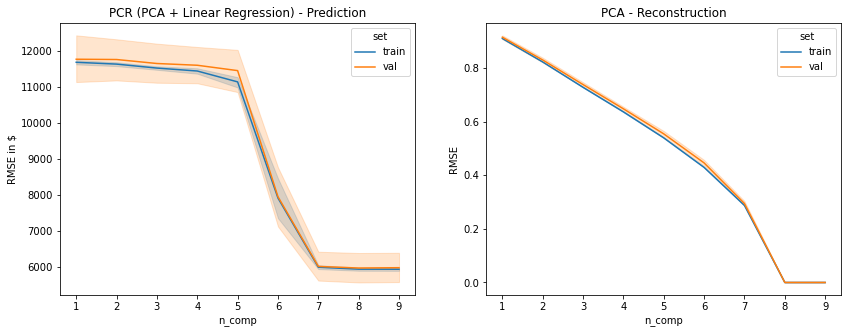

In [138]:
kf = KFold(10, shuffle=True, random_state=23)
results = pd.DataFrame()
idx = 0
for nc in range(1, X.shape[1]+1):
    fd = 0
    for train_kf_ind, val_kf_ind in kf.split(X_train):
        X_train_kf,y_train_kf = X_train.to_numpy()[train_kf_ind,:],y_train.to_numpy()[train_kf_ind]
        X_val_kf,y_val_kf = X_train.to_numpy()[val_kf_ind,:], y_train.to_numpy()[val_kf_ind]
        rmse_rec_train, rmse_rec_val, rmse_pcr_train,rmse_pcr_val = pc_regression(nc, X_train_kf, X_val_kf,y_train_kf,y_val_kf)
        results = results.append(pd.DataFrame({'n_comp': nc, 'fold': fd,'set': 'train', 'reconstr': rmse_rec_train, 'linreg': rmse_pcr_train}, index=[idx]))
        results = results.append(pd.DataFrame({'n_comp': nc, 'fold': fd,'set': 'val', 'reconstr': rmse_rec_val, 'linreg': rmse_pcr_val},index=[idx+1]))
        fd = fd+1
        idx = idx+2

f,axs = plt.subplots(1,2,figsize=(14,5))
sns.lineplot(x='n_comp', y='linreg', hue='set', data=results,ax=axs[0])
sns.lineplot(x='n_comp', y='reconstr', hue='set', data=results,ax=axs[1])
axs[0].set_title('PCR (PCA + Linear Regression) - Prediction')
axs[1].set_title('PCA - Reconstruction')
axs[0].set_ylabel('RMSE in \$')
axs[1].set_ylabel('RMSE')
plt.show()

**Task 4.2**

Based on the results of your cross-validation, choose the number of Principal Components you think is best. Again, build a model of a Principal Component Regression. That is, a PCA followed by a linear regression on the features transformed with the PCA. Fit your model with the scaled training data and compute the RMSE on the test set. Store your chosen number of PCs in the variable `best_n_components` and the RMSE in the variable `rmse_pcr_test`!

In [140]:
# YOUR CODE HERE
best_n_components = 8

rmse_rec_train,rmse_rec_test,rmse_pcr_train,rmse_pcr_test = pc_regression(best_n_components, X_train, X_test,y_train,y_test)


print('Final RMSE on the test set: ' + str(rmse_pcr_test) + 'with number of components: ' + str(best_n_components))

Final RMSE on the test set: 6287.030285341033with number of components: 8
